# Práctica 1, Sesión 2: Derivadas y descenso por gradiente

## 1. Derivadas

**Derivada:** $\;$ de $\,f:\mathbb{R}\to\mathbb{R}\,$ en $x$ es la pendiente de la recta tangente a $f$ en $x$

**Ejemplo:** $\quad f(x)=5x^3+2x^2-3x$
$$\begin{align*}
f'(x)&=15x^2+4x-3,\quad f'(x)=0\to x_1=-3/5,\, x_2=1/3\\
f''(x)&=30x+4,\quad f''(x_1)=-14<0\to\text{máximo},\quad f''(x_2)=14>0\to\text{mínimo}
\end{align*}$$

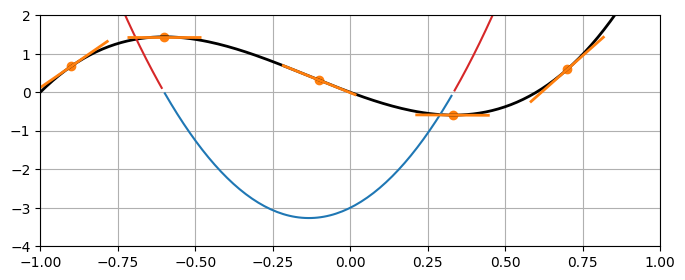

In [1]:
import numpy as np; import matplotlib.pyplot as plt; from matplotlib.collections import LineCollection
f = lambda x: 5 * np.power(x, 3) + 2 * np.square(x) - 3 * x; d = lambda x: 15 * np.square(x) + 4 * x - 3
fig, ax = plt.subplots(1, 1, figsize=(8, 3)); ax.grid(); ax.axis([-1, 1, -4, 2])
x = np.linspace(-1, 1, 200); plt.plot(x, f(x), c='black', lw=2)
plt.plot(x, np.ma.masked_less(d(x), 0), c='C3')
plt.plot(x, np.ma.masked_greater_equal(d(x), 0), c='C0')
X = np.array([-.9, -.6, -.1, .33, .7]); Y = f(X); ax.scatter(X, Y, c='C1')
L = np.zeros((len(X), 2, 2)); r = 0.12
L[:, 0, :] = np.c_[X - r, Y - r * d(X)]
L[:, 1, :] = np.c_[X + r, Y + r * d(X)]
ax.add_collection(LineCollection(L, lw=2, colors='C1', ls='solid'));

**Gradiente:** $\;$ de $\,\mathcal{f}:\mathbb{R}^n\to\mathbb{R}\,$ en $\,\boldsymbol{x}\,$ es la dirección en la que $f$ crece más rápidamente desde $\,\boldsymbol{x}$

**Neg-gradiente:** $\;$ el gradiente con signo cambiado indica la dirección en la que $f$ **decrece** más rápidamente

**Ejemplo:** $\quad \boldsymbol{x}=(x_1, x_2)^t, \quad y=f(\boldsymbol{x})=a_1x_1^2+a_2x_2^2, \quad a_1,a_2\neq 0$
$$\boldsymbol{g}(\boldsymbol{x})=\frac{\partial y}{\partial\boldsymbol{x}}%
=\begin{pmatrix}\frac{\partial y}{\partial x_1}\\\frac{\partial y}{\partial x_2}\end{pmatrix}%
=\begin{pmatrix}2a_1x_1\\2a_2x_2\end{pmatrix},\quad%
\boldsymbol{g}(\boldsymbol{x})=\boldsymbol{0}\to\boldsymbol{x}=\boldsymbol{0}$$
$$\mathbf{H}(\boldsymbol{x})=\frac{\partial\boldsymbol{g}}{\partial\boldsymbol{x}}
=\begin{pmatrix}\frac{\partial g_1}{\partial\boldsymbol{x}}\\\frac{\partial g_2}{\partial\boldsymbol{x}}\end{pmatrix}
=\begin{pmatrix}\frac{\partial g_1}{\partial x_1}&\frac{\partial g_1}{\partial x_2}\\%
\frac{\partial g_2}{\partial x_1}&\frac{\partial g_2}{\partial x_2}\end{pmatrix}
=\operatorname{diag}(2a_1, 2a_2)%
=\begin{cases}\succ 0&\text{si}\;a_1, a_2>0\\%
\prec 0&\text{si}\;a_1, a_2<0\\%
\text{indefinida}&a_1, a_2\,\text{de signo opuesto}\end{cases}$$

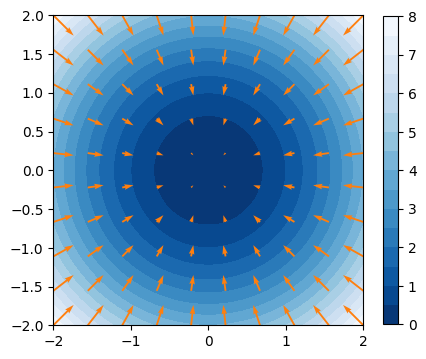

In [2]:
import numpy as np; import matplotlib.pyplot as plt
R = np.linspace(-2, 2, 50); X1, X2 = np.meshgrid(R, R); X = np.c_[np.ravel(X1), np.ravel(X2)]
a = np.array([1, 1]); Y = (np.square(X) @ a).reshape(X1.shape)
_, ax = plt.subplots(1, 1, figsize=(5, 5)); ax.set(aspect='equal')
cp = ax.contourf(X1, X2, Y, 15, cmap='Blues_r'); plt.colorbar(cp, ax=ax, shrink=.8)
r = np.linspace(-2, 2, 10); x1, x2 = np.meshgrid(r, r); x = np.c_[np.ravel(x1), np.ravel(x2)]
neg_grad = -x @ np.diag(2 * a); ax.quiver(x[:, 0], x[:, 1], neg_grad[:, 0], neg_grad[:, 1], color='C1');

## 2. Descenso por gradiente

**Objetivo:** $\quad$ minimizar $\,\mathcal{f}:\mathbb{R}^n\to\mathbb{R}\,$ iterativamente, a partir de un punto de inicio $\,\boldsymbol{x}_0$

**Descenso por gradiente (GD):** $\quad\boldsymbol{x}_{i+1}=\boldsymbol{x}_i-\eta_i\boldsymbol{g}(\boldsymbol{x}_i)\;$ para $\,i=0,1,\dotsc$ 

**Factor de aprendizaje constante:** $\;\eta_i=\eta;\;$ GD puede no converger si $\,\eta\,$ es muy grande, o hacerlo muy lentamente si $\,\eta\,$ es muy pequeño

**Caída escalonada:** $\;\eta_i=\eta_0\gamma^{\lfloor i/s\rfloor}\,$ con *decay rate* $\,\gamma\,$ y *decay step* $\,s;\;$ por ejemplo, $\,\eta_0=0.1,\,\gamma=0.5\,$ y $\,s=10$    

**Momentum:** $\;$ acelera el movimiento cuando el gradiente no cambia mucho y lo frena cuando el gradiente cambia bruscamente
$$\boldsymbol{x}_{i+1}=\boldsymbol{x}_i-\eta\,\boldsymbol{m}_{i+1}\quad\text{con}\quad%
\boldsymbol{m}_{i+1}=\beta\boldsymbol{m}_i+\boldsymbol{g}(\boldsymbol{x}_i)\quad\text{donde}\quad%
\beta\in[0,1)\quad(\text{típicamente}\,\beta=0.9)$$

**Inconveniente:** $\;$ momentum suele oscilar al acercarse a un mínimo

**Momentum Nesterov:** $\;$ añade un paso de extrapolación para amortiguar oscilaciones
$$\boldsymbol{x}_{i+1}=\boldsymbol{x}_i+\boldsymbol{m}_{i+1}\quad\text{con}\quad%
\boldsymbol{m}_{i+1}=\beta\boldsymbol{m}_i-\eta\,\boldsymbol{g}(\boldsymbol{x}_i+\beta\boldsymbol{m}_i)\quad\text{donde}\quad%
\beta\in[0,1)\quad(\text{típicamente}\,\beta=0.9)$$

**Implementación:** $\;$ GD con caída escalonada y momentum Nesterov; devuelve el camino recorrido

In [3]:
def GD(g, x0, eta=0.1, decay_rate=0.5, decay_step=10, beta=0.9, tol=1e-3, max_iter=100):
    n = len(x0); X = np.zeros((max_iter + 1, n)); X[0, :] = x0; delta = np.inf; i = 0; m = np.zeros(2)
    while np.max(np.abs(delta)) > tol and i < max_iter:
        m = beta * m - eta * g(X[i, :] + beta * m); delta = m; X[i+1, :] = X[i, :] + delta; i = i + 1
        if i % decay_step == 0: eta = eta * decay_rate
    return X[:i+1, :]

**Función auxiliar:** $\;$ para mostrar el camino recorrido por GD en 2d

In [4]:
def plot_GD(f, P, xlim=(-1.1, 1.1), ylim=(-1.1, 1.1), levels=15, cmap='Blues_r'):
    X1, X2 = np.meshgrid(np.linspace(*xlim, 50), np.linspace(*ylim, 50))
    X = np.c_[np.ravel(X1), np.ravel(X2)]; Y = np.apply_along_axis(f, 1, X).reshape(X1.shape)
    _, ax = plt.subplots(1, 1, figsize=(5, 5)); ax.set_xlim(xlim); ax.set_ylim(ylim) 
    cp = ax.contourf(X1, X2, Y, levels=levels, cmap=cmap); plt.colorbar(cp, ax=ax, shrink=.8)
    ax.scatter(*P.T, c='C1', s=8); ax.scatter(*P[-1, :].T, c='C3', s=64)
    L = np.zeros((len(P)-1, 2, 2)); L[:, 0, :] = P[:-1, :]; L[:, 1, :] = P[1:, :]
    ax.add_collection(LineCollection(L, lw=1, colors='C1', ls='solid'));

**Ejemplo (cont.):** $\;$ Minimización de $\,y=a_1x_1^2+a_2x_2^2,\,a_1=a_2=1,\,$ a partir de $\,\boldsymbol{x}_0=(-1,-1)^t.\,$ En 45 iteraciones se aproxima al mínimo en $(0,0)^t$.

iteraciones = 45  solución = [-0.0337 -0.0337]


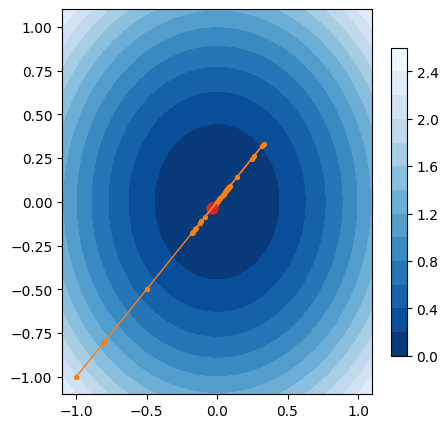

In [5]:
a = np.array([1, 1]); f = lambda x: (a @ np.square(x)).sum(); g = lambda x: x @ np.diag(2 * a)
P = GD(g, np.array([-1, -1])); plot_GD(f, P)
print(f'iteraciones = {len(P)-1}  solución = {np.round(P[-1, :], 4)}')

**Ejercicio:** $\;$ Estudia la convergencia y número de iteraciones de GD en función del ajuste del factor de aprendizaje y la $\beta$ de Nesterov.
1. GD estándar ($\beta=0$): $\;$ ¿Converge con factor de aprendizaje constante muy pequeño o muy grande?
2. GD estándar ($\beta=0$): $\;$ ¿Converge con caída escalonada muy rápida o muy lenta?
3. Momentum Nesterov: $\;$ Si la caída escalonada se ajusta adecuadamente, ¿cuál es el efecto de $\beta$?

**Solución:**

In [6]:
for eta in [1e-3, 1e-2, 1e-1, 1e0]:
    P = GD(g, np.array([-1, -1]), eta=eta, decay_rate=1.0, beta=0)
    print(f'eta = {eta}  iteraciones = {len(P)-1}  solución = {np.round(P[-1, :], 4)}')

eta = 0.001  iteraciones = 100  solución = [-0.8186 -0.8186]
eta = 0.01  iteraciones = 100  solución = [-0.1326 -0.1326]
eta = 0.1  iteraciones = 25  solución = [-0.0038 -0.0038]
eta = 1.0  iteraciones = 100  solución = [-1. -1.]


In [7]:
for rate in [.01, .1, .5]:
    for step in [1, 10, 50]:
        P = GD(g, np.array([-1, -1]), decay_rate=rate, decay_step=step,  beta=0)
        print(f'rate = {rate:.2f}  step = {step:2d}  iteraciones = {len(P)-1:3d}  solución = {P[-1, :]}')

rate = 0.01  step =  1  iteraciones =   3  solución = [-0.79838403 -0.79838403]
rate = 0.01  step = 10  iteraciones =  11  solución = [-0.10715943 -0.10715943]
rate = 0.01  step = 50  iteraciones =  25  solución = [-0.00377789 -0.00377789]
rate = 0.10  step =  1  iteraciones =   4  solución = [-0.78227551 -0.78227551]
rate = 0.10  step = 10  iteraciones =  21  solución = [-0.08755706 -0.08755706]
rate = 0.10  step = 50  iteraciones =  25  solución = [-0.00377789 -0.00377789]
rate = 0.50  step =  1  iteraciones =   9  solución = [-0.65087431 -0.65087431]
rate = 0.50  step = 10  iteraciones =  31  solución = [-0.02185575 -0.02185575]
rate = 0.50  step = 50  iteraciones =  25  solución = [-0.00377789 -0.00377789]


In [8]:
for beta in [.1, .5, .9]:
    P = GD(g, np.array([-1, -1]), beta=beta)
    print(f'beta = {beta}  iteraciones = {len(P)-1}  solución = {np.round(P[-1, :], 4)}')

beta = 0.1  iteraciones = 27  solución = [-0.0167 -0.0167]
beta = 0.5  iteraciones = 10  solución = [0.011 0.011]
beta = 0.9  iteraciones = 45  solución = [-0.0337 -0.0337]


**Ejercicio:** $\;$ Aplica GD a $\;y=\frac{1}{2}\boldsymbol{x}^t\mathbf{A}\boldsymbol{x}+\boldsymbol{b}^t\boldsymbol{x}+c\;$ a partir de $\;\boldsymbol{x}_0=(-1,-1)^t,\;\boldsymbol{g}(\boldsymbol{x})=(\mathbf{A}+\mathbf{A}^t)\boldsymbol{x}+\boldsymbol{b},\;$ en los casos
$$\mathbf{A}=\begin{pmatrix}20&5\\5&16\end{pmatrix}\,\text{bien condicionada}\quad\text{y}\quad% 
\mathbf{A}=\begin{pmatrix}20&5\\5&2\end{pmatrix}\,\text{peor condicionada};\quad\boldsymbol{b}=(-14, -6)^t,\;c=10$$
Comprueba que la solución se aproxime al mínimo, $\;\boldsymbol{x}^*=-(\mathbf{A}+\mathbf{A}^t)^{-1}\boldsymbol{b}$.

**Solución:**

min = [0.3288 0.0847]  i = 12  sol = [0.3282 0.0849]


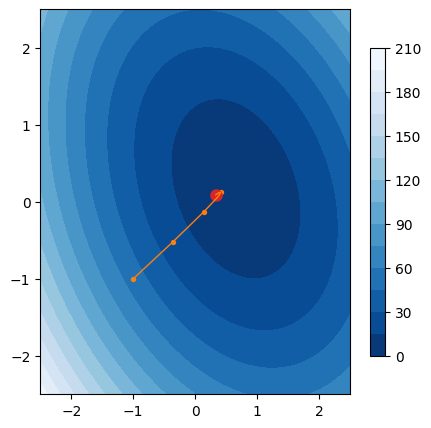

In [9]:
A, b, c = np.array([ [20, 5], [5, 16] ]), np.array([-14, -6]), 10; xstar = -np.linalg.inv(A+A.T) @ b
f = lambda x: 0.5 * x.T @ A @ x + b @ x + c; g = lambda x: (A + A.T) @ x + b
P = GD(g, np.array([-1, -1]), eta=0.01, beta=0.5); plot_GD(f, P, xlim=(-2.5, 2.5), ylim=(-2.5, 2.5))
print(f'min = {np.round(xstar, 4)}  i = {len(P)-1}  sol = {np.round(P[-1, :], 4)}')

min = [-0.0667  1.6667]  i = 1000  sol = [-0.0667  1.6667]


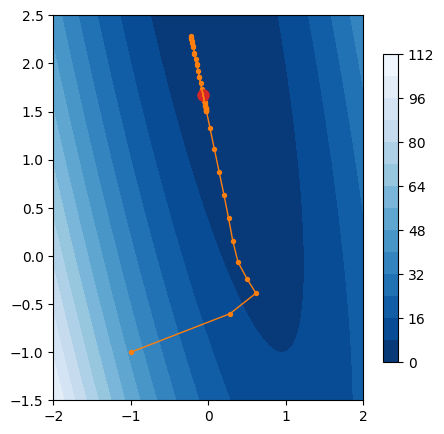

In [10]:
A, b, c = np.array([ [20, 5], [5,  2] ]), np.array([-14, -6]), 10; xstar = -np.linalg.inv(A+A.T) @ b
f = lambda x: 0.5 * x.T @ A @ x + b @ x + c; g = lambda x: (A + A.T) @ x + b
P = GD(g, np.array([-1, -1]), eta=0.02, decay_step=100, beta=0.9, tol=np.finfo(float).eps, max_iter=1000)
plot_GD(f, P, xlim=(-2, 2), ylim=(-1.5, 2.5))
print(f'min = {np.round(xstar, 4)}  i = {len(P)-1}  sol = {np.round(P[-1, :], 4)}')

## 3. Diferenciación simbólica (opcional)

**Diferenciación simbólica:** $\;$ diferenciación mediante computación simbólica

**[SymPy:](https://www.sympy.org/en/index.html)** $\;$ librería python de computación simbólica

**Ejemplo:** $\;f(x_1,x_2)=x_2\exp(x_1)\sqrt{x_1+x_2\exp(x_1)}$

In [11]:
from sympy import symbols, exp, sqrt, simplify, lambdify
x, y = symbols('x1 x2')
spf = y * sqrt(x + y * exp(x)) * exp(x); f = lambdify([x, y], spf, "numpy")
spdx = simplify(spf.diff(x)); dx = lambdify([x, y], spdx, "numpy")
spdy = simplify(spf.diff(y)); dy = lambdify([x, y], spdy, "numpy")
display(spf, spdx, spdy)

x2*sqrt(x1 + x2*exp(x1))*exp(x1)

x2*(2*x1 + 3*x2*exp(x1) + 1)*exp(x1)/(2*sqrt(x1 + x2*exp(x1)))

(x1 + 3*x2*exp(x1)/2)*exp(x1)/sqrt(x1 + x2*exp(x1))

iteraciones = 61  solución = [0.2712 0.2006]


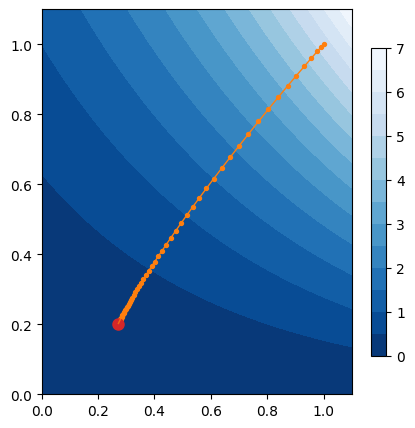

In [12]:
import numpy as np; import matplotlib.pyplot as plt
npf = lambda xy: f(xy[0], xy[1])
npg = lambda xy: np.array([dx(xy[0], xy[1]), dy(xy[0], xy[1])])
P = GD(npg, np.array([1, 1]), eta=.001); plot_GD(npf, P, xlim=(0, 1.1), ylim=(0, 1.1))
print(f'iteraciones = {len(P)-1}  solución = {np.round(P[-1, :], 4)}')

**Ejercicio:** $\;$ Aplica GD a la [**función Rosenbrock**](https://en.wikipedia.org/wiki/Rosenbrock_function), $\,f(x, y)=(a-x)^2+b(y-x^2)^2,\,$ con $\,a=1,\,$ $b=10\,$ y punto de inicio $\,(x_0,y_0)^t=(-1, -1)$. Comprueba que la solución se aproxime al mínimo global en $(a,a^2)$.

**Solución:**

In [13]:
from sympy import symbols, simplify, lambdify
x, y = symbols('x1 x2')
spf = (1-x)**2 + 10 * (y-x**2)**2; f = lambdify([x, y], spf, "numpy")
spdx = simplify(spf.diff(x)); dx = lambdify([x, y], spdx, "numpy")
spdy = simplify(spf.diff(y)); dy = lambdify([x, y], spdy, "numpy")
display(spf, spdx, spdy)

(1 - x1)**2 + 10*(-x1**2 + x2)**2

40*x1*(x1**2 - x2) + 2*x1 - 2

-20*x1**2 + 20*x2

i = 22918  sol = [1.0005 1.0011]


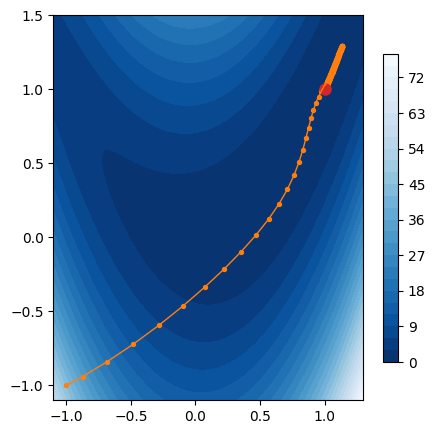

In [14]:
npf = lambda xy: f(xy[0], xy[1]); npg = lambda xy: np.array([dx(xy[0], xy[1]), dy(xy[0], xy[1])])
P = GD(npg, np.array([-1, -1]), eta=0.0015, decay_step=100, decay_rate=0.9, beta=0.9, tol=np.finfo(float).eps, max_iter=100000)
plot_GD(npf, P, xlim=(-1.1, 1.3), ylim=(-1.1, 1.5), levels=30, cmap='Blues_r')
print(f'i = {len(P)-1}  sol = {np.round(P[-1, :], 4)}')

**Ejercicio:** $\;$ Aplica GD a Rosenbrock multidimensional, $\,f:\mathbb{R}^n\to\mathbb{R},\,$ con mínimo en $\,\boldsymbol{1}\,$ si $\,3\leq n\leq 7\,$ (y cerca de $\,(-1,1,\dotsc,1)\,$ si $\,4\leq n\leq 7\,$)
$$f(\boldsymbol{x})=\sum_{i=1}^{n-1}[100\,(x_{i+1}-x_i^2)^2+(1-x_i)^2]$$

**Ejercicio:** $\;$ Aplica GD a otras [**funciones de test para optimización**](https://en.wikipedia.org/wiki/Test_functions_for_optimization).